# VISUALIZACIÓN

### Importacion de librerías necesarias

In [2]:
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy import stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
import matplotlib.pyplot as plt

# Queremos ver los diferentes tipos de gráficos de la librería plt de matplot, para practicar con ellos y encontrar el más conveniente
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
# Ahora queremos ver los diferentes tipos de sns dentro de seaborn
import seaborn as sns

# Obtener los nombres de los conjuntos de datos incorporados en Seaborn, para practicar con ellos y encontrar el más conveniente
datasets = sns.get_dataset_names()
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### Importamos el fichero csv de trabajo

In [5]:
df = pd.read_csv("world_data_sin_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agriculturalland,landarea,birthrate,callingcode,capital/majorcity,co2-emissions,currency-code,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,continent,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,32.49,93.0,Kabul,8672.0,AFN,4.47,2.1,1.910135e+10,104.0,47.9,Kabul,64.5,Pashto,78.4,0.28,38041754.0,9797273.0,33.939110,67.709953,Asia,323000.0,149.900,2.30,0.70,9.70,638.0,0.43,48.90,9.30,71.40,11.120
1,Albania,105.0,AL,43.1,28748.0,11.78,355.0,Tirana,4536.0,ALL,1.62,28.1,1.527808e+10,107.0,7.8,Tirana,78.5,Albanian,56.9,1.20,2854191.0,1747593.0,41.153332,20.168331,Europe,9000.0,119.050,1.40,1.36,55.00,15.0,1.12,55.70,18.60,36.60,12.330
2,Algeria,18.0,DZ,17.4,2381741.0,24.28,213.0,Algiers,150006.0,DZD,3.02,0.8,1.699882e+11,109.9,20.1,Algiers,76.7,Arabic,28.1,1.72,43053054.0,31510100.0,28.033886,1.659626,Africa,317000.0,151.360,2.00,0.28,51.40,112.0,0.95,41.20,37.20,66.10,11.700
3,Andorra,164.0,AD,40.0,468.0,7.20,376.0,Andorra la Vella,469.0,EUR,1.27,34.0,3.154058e+09,106.4,2.7,Andorra la Vella,73.2,Catalan,36.4,3.33,77142.0,67873.0,42.506285,1.521801,Europe,22200.0,108.672,0.92,1.51,59.58,169.0,6.63,60.32,18.24,39.48,6.782
4,Angola,26.0,AO,47.5,1246700.0,40.73,244.0,Luanda,34693.0,AOA,5.52,46.3,9.463542e+10,113.5,51.6,Luanda,60.8,Portuguese,33.4,0.21,31825295.0,21061025.0,-11.202692,17.873887,Africa,117000.0,261.730,17.10,0.97,9.30,241.0,0.71,77.50,9.20,49.10,6.890


# 1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

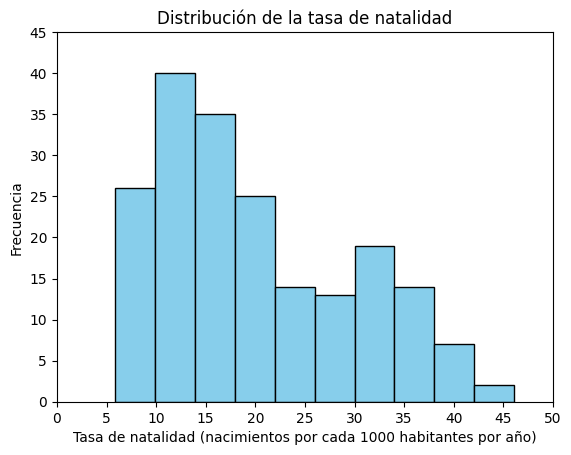

La mediana de la tasa de natalidad es 17.95 nacimientos por cada 1000 habitantes por año
La media de la tasa de natalidad es 20.15 nacimientos por cada 1000 habitantes por año


In [6]:
# Crear un histograma del birthrate = tasa de natalidad (nacimientos por cada 1000 habitantes por año)
plt.hist(df['birthrate'], color='skyblue', edgecolor='black')

# Establecer los límites del eje x e y
plt.ylim(0, 45)
plt.xlim(0, 50)

# Configurar los ticks del eje x en intervalos de 5 unidades
plt.xticks(np.arange(0, 51, 5))


# Agregar etiquetas y título
plt.xlabel('Tasa de natalidad (nacimientos por cada 1000 habitantes por año)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la tasa de natalidad')

# Mostrar el histograma
plt.show()

# Calculamos la mediana y la media de la tasa de natalidad
median = df['birthrate'].median()
mean = df['birthrate'].mean()

# Imprimimos los resultados
print("La mediana de la tasa de natalidad es", round(df['birthrate'].median(),2), "nacimientos por cada 1000 habitantes por año")
print("La media de la tasa de natalidad es", round(df['birthrate'].mean(),2), "nacimientos por cada 1000 habitantes por año")

In [7]:
df['birthrate'].max()

46.08

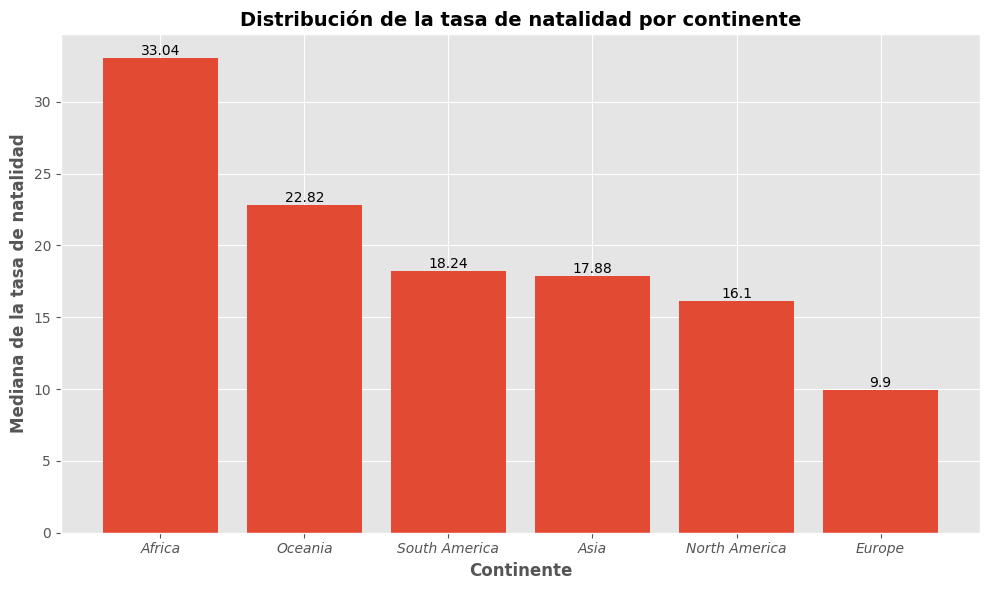

El gráfico muestra que los países africanos tienen las tasas de natalidad más altas, mientras que los países europeos tienen las tasas de natalidad más bajas.


In [8]:
# Analizamos la tasa de natalidad por continentes

# Obtener las medianas por continente
medianas = df.groupby("continent")["birthrate"].median()

# Para generar el gráfico con los valores de las medianas en orden descendente de izquierda a derecha, creamos la variable medianas_sorted
medianas_sorted = medianas.sort_values(ascending=False)

# Utilizar el estilo de gráfico 'ggplot'
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('classic')
#plt.style.use('bmh')


# Generar el gráfico de barras, ordenado de mayor a menor por medianas
plt.figure(figsize=(10, 6))
bars = plt.bar(medianas_sorted.index, medianas_sorted.values)
plt.title("Distribución de la tasa de natalidad por continente", fontsize=14, fontweight='bold')
plt.xlabel("Continente", fontsize=12, fontweight='bold')
plt.ylabel("Mediana de la tasa de natalidad", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontstyle='italic')
plt.yticks(fontsize=10)

# En el gráfico, queremos mostrar los valores de las medianas sobre las barras
for bar, median_value in zip(bars, medianas_sorted.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(median_value, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Finalmente, imprimir conclusiones
print("El gráfico muestra que los países africanos tienen las tasas de natalidad más altas, mientras que los países europeos tienen las tasas de natalidad más bajas.")


# 2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida?
Proporciona una breve descripción de los patrones que observes.

In [9]:
# Calculamos la tasa de mortalidad infantil y la esperanza de vida
infantmortality = df["infantmortality"]
lifeexpectancy = df["lifeexpectancy"]

# Calculamos la correlación entre la tasa de mortalidad infantil y la esperanza de vida
correlation = df["infantmortality"].corr(df["lifeexpectancy"])

# Imprimimos las conclusiones
print("El valor de correlación", round(correlation, 2),"indica una fuerte correlación negativa entre la tasa de mortalidad infantil y la esperanza de vida.","\nEsto sugiere que, en general, a medida que la tasa de mortalidad infantil aumenta (es decir, hay más muertes de niños a una edad temprana), la esperanza de vida tiende a disminuir.", "\nEn otras palabras, hay una asociación fuerte y negativa entre estas dos variables: a mayores tasas de mortalidad infantil, por lo general, corresponde una menor esperanza de vida en la población estudiada.")

El valor de correlación -0.92 indica una fuerte correlación negativa entre la tasa de mortalidad infantil y la esperanza de vida. 
Esto sugiere que, en general, a medida que la tasa de mortalidad infantil aumenta (es decir, hay más muertes de niños a una edad temprana), la esperanza de vida tiende a disminuir. 
En otras palabras, hay una asociación fuerte y negativa entre estas dos variables: a mayores tasas de mortalidad infantil, por lo general, corresponde una menor esperanza de vida en la población estudiada.


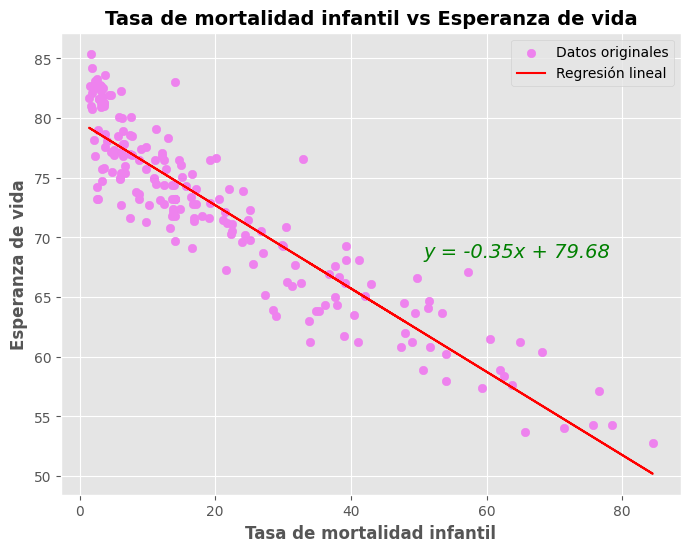

In [10]:
# BONUS: dado que la correlación es prácticamente lineal, queremos calcular la regresión linear y su pendiente, y mostrarlas en el gráfico (somos así de generosas ;)

from sklearn.linear_model import LinearRegression

# Convertir los arrays en formato numpy y remodelarlos para trabajar con scikit-learn
X = np.array(infantmortality).reshape(-1, 1)
y = np.array(lifeexpectancy)

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo utilizando los datos
modelo.fit(X, y)

# Obtener el coeficiente de regresión (pendiente)
coeficiente = modelo.coef_[0]

# Obtener el término independiente (intercepto)
intercepto = modelo.intercept_

# Calcular los valores predichos utilizando el modelo de regresión
predicciones = modelo.predict(X)

# Graficar los datos originales y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(infantmortality, lifeexpectancy, label='Datos originales', color='violet')
plt.plot(infantmortality, predicciones, label='Regresión lineal', color='red')

# Mostrar la fórmula de la regresión lineal en el gráfico
plt.text(np.max(infantmortality)*0.6, np.max(lifeexpectancy)*0.8,
         f"y = {coeficiente:.2f}x + {intercepto:.2f}",
         fontsize=14, fontstyle='italic', color='green')

plt.xlabel('Tasa de mortalidad infantil', fontsize=12, fontweight='bold')
plt.ylabel('Esperanza de vida', fontsize=12, fontweight='bold')
plt.title('Tasa de mortalidad infantil vs Esperanza de vida', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Con la expresión:
     
<span style="color:yellow"> Esperanza de vida = -0.35 * Tasa de mortalidad infantil + 79.68 </span>

podremos predecir la esperanza de vida para diferentes valores de la tasa de mortalidad infantil.

 - la pendiente negativa sugiere que cuando la mortalidad infantil aumenta, la esperanza de vida disminuye (esto es: si la tasa de mortalidad infantil asciende, se espera que la esperanza de vida tienda a disminuir)
 - el valor de la pendiente 0.35 sugiere que, en promedio, por cada aumento unitario en la tasa de mortalidad infantil (muertes por cada 1000 nacidos), la esperanza de vida disminuye en 0.35 años (casi 4 meses)
 - el valor de la esperanza de vida cuando la tasa de mortalidad infantil es igual a cero es de 79.68 años (punto de corte con el eje "x"). 



# 3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos?
Proporciona el porcentaje de países en ese continente.

Los continentes que tenemos son Asia, Europe, Africa, North America, South America, Oceania
--------------------------------------------------
Esta es la lista del número de países de cada continente:
 continent
Asia             65
Africa           47
Europe           41
North America    21
Oceania          11
South America    10
Name: count, dtype: int64
--------------------------------------------------
El continente con la mayor cantidad de países es 'Asia' con 65 países, representando el 33.33% del total de datos.


C:\Users\rocio\AppData\Local\Temp\ipykernel_6148\1275751503.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentajes = [(countries_per_continent[i] / df.shape[0]) * 100 for i in range(len(countries_per_continent))]
C:\Users\rocio\AppData\Local\Temp\ipykernel_6148\1275751503.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  etiquetas = [f'{countries_per_continent.index[i]} \n{countries_per_continent[i]} países' for i in range(len(countries_per_continent))]


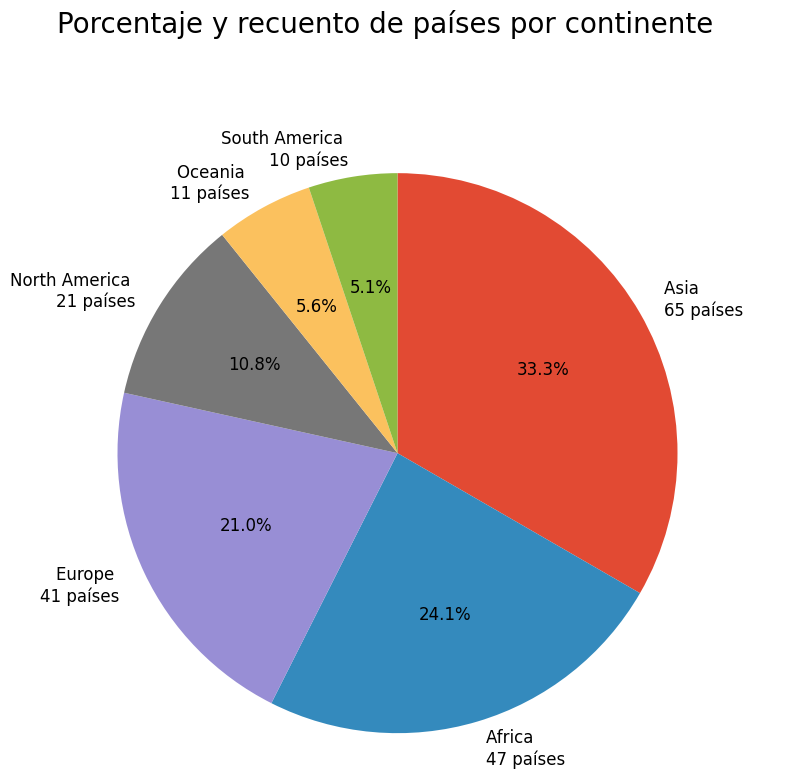

In [11]:
# Obtenemos la lista de continentes
continents = df["continent"].unique()
continents_text = ', '.join(continents)
print("Los continentes que tenemos son", continents_text)
print("-"*50)

# Obtener la cantidad de países por continente, sabemos que no hay países repetidos, por lo que podemos hacer un conteo de cada nombre de continente
countries_per_continent = df['continent'].value_counts().sort_values(ascending=False)
print("Esta es la lista del número de países de cada continente:\n",countries_per_continent)
print("-"*50)

# Obtener el continente con la mayor cantidad de países
continent_with_most_countries = countries_per_continent.idxmax()

# Obtener el número de países en el continente con la mayor cantidad de países
most_countries_count = countries_per_continent.max()

# Calcular el porcentaje de países en ese continente
percentage = most_countries_count / len(df)

# Imprimir el resultado
print(f"El continente con la mayor cantidad de países es '{continent_with_most_countries}' con {most_countries_count} países, representando el {percentage * 100:.2f}% del total de datos.")

# Visualizamos en un pie chart

# Crear las etiquetas con información de porcentaje y recuento de países
porcentajes = [(countries_per_continent[i] / df.shape[0]) * 100 for i in range(len(countries_per_continent))]
etiquetas = [f'{countries_per_continent.index[i]} \n{countries_per_continent[i]} países' for i in range(len(countries_per_continent))]

# Crear un gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(countries_per_continent, labels=etiquetas, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 12})
plt.suptitle('Porcentaje y recuento de países por continente', fontsize=20, y=1.05)  # Título principal
plt.axis('equal')  # Para que el gráfico de pastel se vea como un círculo
plt.show()

# 4.¿Cuál es la mediana de la esperanza de vida en Europa? 
Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

La mediana de la esperanza de vida en Europa es: 79.00
El rango intercuartil (IQR) aproximado es: 6.30
Los valores atípicos en Europa son: [], por lo que NO hay valores atípicos


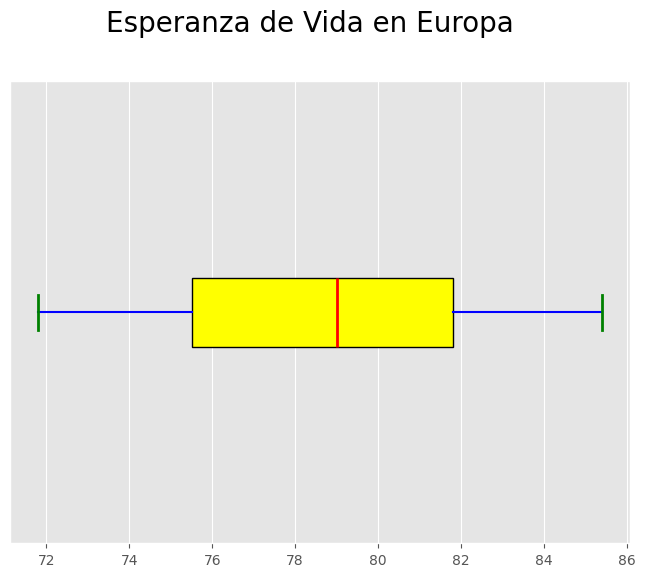

los valores atípicos aparecerían en color naranja fuera de los bigotes del boxplot


In [12]:
# Filtrar los datos de esperanza de vida para Europa
esperanza_vida_europa = df[df['continent'] == 'Europe']['lifeexpectancy']

# Calcular la mediana de la esperanza de vida en Europa
mediana_europa = esperanza_vida_europa.median()

# Calcular los cuartiles
q1 = esperanza_vida_europa.quantile(0.25)
q3 = esperanza_vida_europa.quantile(0.75)

# Calcular el rango intercuartil (IQR)
iqr = q3 - q1

# Calcular los límites para identificar valores atípicos
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificar valores atípicos
valores_atipicos = esperanza_vida_europa[(esperanza_vida_europa < limite_inferior) | (esperanza_vida_europa > limite_superior)]

# Imprimir los resultados
print(f"La mediana de la esperanza de vida en Europa es: {mediana_europa:.2f}")
print(f"El rango intercuartil (IQR) aproximado es: {iqr:.2f}")
print(f"Los valores atípicos en Europa son: {valores_atipicos.tolist()}, por lo que NO hay valores atípicos")

# Confirmamos que no hay valores atípicos visualizando en un boxplot



plt.figure(figsize=(8, 6))
box = plt.boxplot(esperanza_vida_europa, vert=False, patch_artist=True)

# Cambiar los colores de los elementos del boxplot
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=1.5)

for cap in box['caps']:
    cap.set(color='green', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='orange', alpha=0.5)  # Cambiar forma y color de los valores atípicos

for boxplot in box['boxes']:
    boxplot.set(facecolor='yellow')  # Cambiar color de la caja

#plt.xlim(0, 100) #modificando estos límites podríamos visualizar los outlayers si los hubiera
plt.suptitle('Esperanza de Vida en Europa', fontsize=20, y=1)
plt.yticks([])
plt.show()
print("los valores atípicos aparecerían en color naranja fuera de los bigotes del boxplot")


## 5.¿Existen relaciones visibles entre la *tasa de natalidad* y las siguientes variables?: *tasa de mortalidad infantil* // *esperanza de vida* // *densidad de población* // *población urbana*
Usa un subplot. Describe cualquier patrón que encuentres.

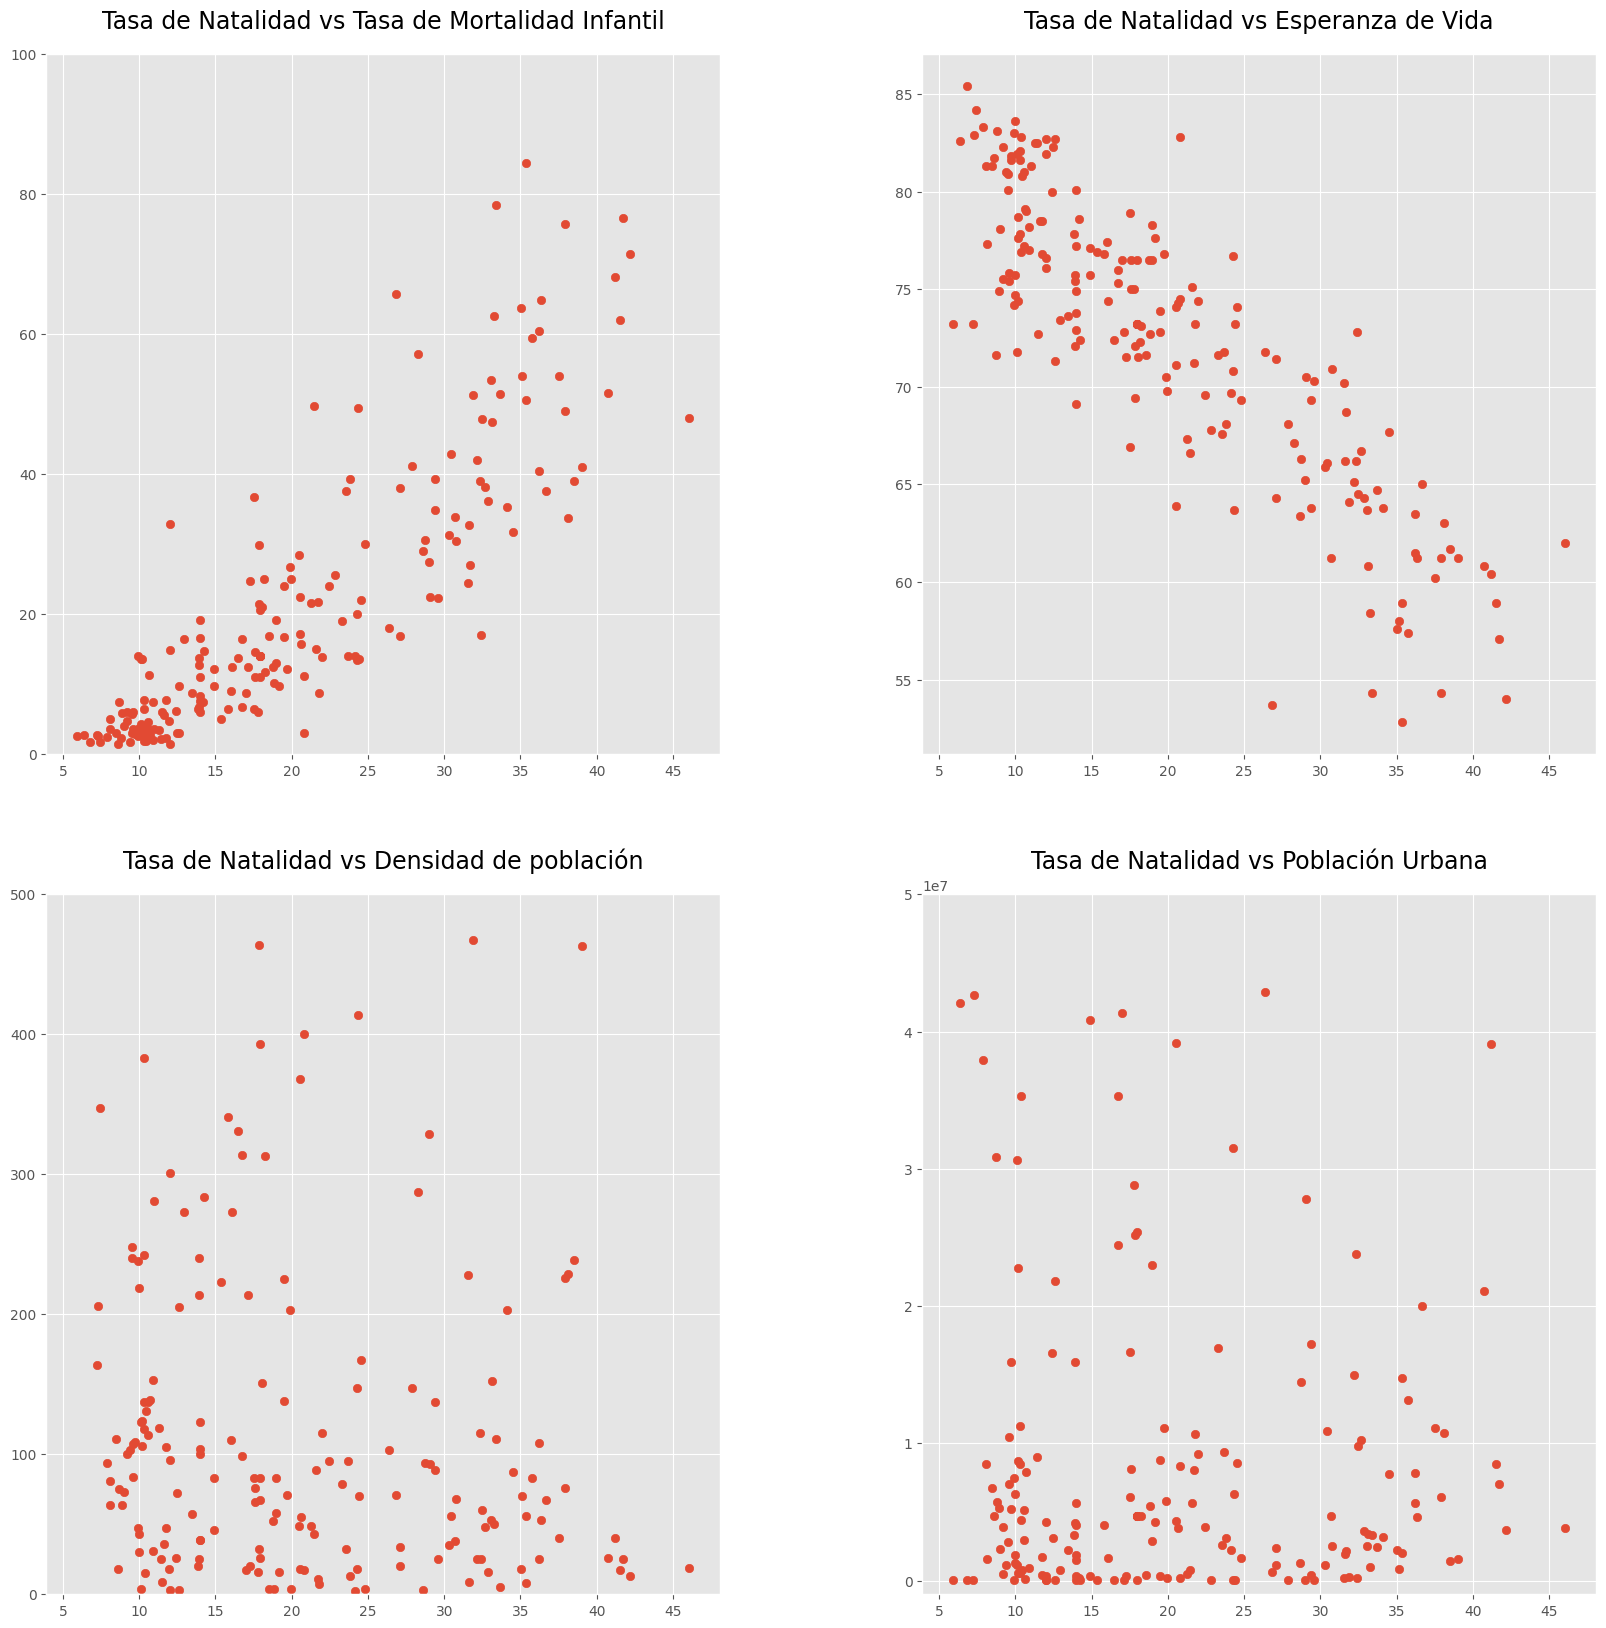

In [13]:
# Crear subplots con relaciones visuales
fig, axs = plt.subplots(2, 2, figsize=(20, 20), gridspec_kw={'wspace': 0.3})  # Modificar el valor de wspace

# Tasa de Natalidad vs Tasa de Mortalidad Infantil
axs[0, 0].scatter(df['birthrate'], df['infantmortality'])
axs[0, 0].set_title('Tasa de Natalidad vs Tasa de Mortalidad Infantil', fontsize=17, y=1.025)
axs[0, 0].set_ylim(0, 100)

# Tasa de Natalidad vs Esperanza de Vida
axs[0, 1].scatter(df['birthrate'], df['lifeexpectancy'])
axs[0, 1].set_title('Tasa de Natalidad vs Esperanza de Vida', fontsize=17, y=1.025)

# Tasa de Natalidad vs Densidad de población
axs[1, 0].scatter(df['birthrate'], df['density'])
axs[1, 0].set_title('Tasa de Natalidad vs Densidad de población', fontsize=17, y=1.025)
axs[1, 0].set_ylim(0, 500)  # Establecer límites en el eje y (de 0 a 500, por ejemplo)

# Tasa de natalidad vs Población Urbana
axs[1, 1].scatter(df['birthrate'], df['urban_population'])
axs[1, 1].set_title('Tasa de Natalidad vs Población Urbana', fontsize=17, y=1.025)
axs[1, 1].set_ylim(-1000000, 50000000)

plt.show()

En general, se puede observar que la tasa de natalidad está negativamente correlacionada con la tasa de mortalidad infantil, la esperanza de vida, la densidad de población y la población urbana. Esto significa que, en general, los países con tasas de mortalidad infantil más bajas, esperanzas de vida más altas, densidades de población más bajas y poblaciones urbanas más altas tienden a tener tasas de natalidad más bajas.

**Tasa de natalidad vs tasa de mortalidad infantil**
La tasa de natalidad está negativamente correlacionada con la tasa de mortalidad infantil. Esto significa que, en general, los países con tasas de mortalidad infantil más bajas tienden a tener tasas de natalidad más bajas.
La relación entre la tasa de natalidad y la tasa de mortalidad infantil es fuerte.

**Tasa de natalidad vs esperanza de vida**
La tasa de natalidad está negativamente correlacionada con la esperanza de vida. Esto significa que, en general, los países con esperanzas de vida más altas tienden a tener tasas de natalidad más bajas.
La relación entre la tasa de natalidad y la esperanza de vida es fuerte.

**Tasa de natalidad vs densidad de población**
La tasa de natalidad está negativamente correlacionada con la densidad de población. Esto significa que, en general, los países con densidades de población más bajas tienden a tener tasas de natalidad más bajas.
La relación entre la tasa de natalidad y la densidad de población es moderada.

**Tasa de natalidad vs población urbana**
La tasa de natalidad está negativamente correlacionada con la población urbana. Esto significa que, en general, los países con poblaciones urbanas más altas tienden a tener tasas de natalidad más bajas.
La relación entre la tasa de natalidad y la población urbana es moderada.

Estos patrones se pueden explicar por una serie de factores:
 - las tasas de mortalidad infantil más bajas y las esperanzas de vida más altas pueden indicar que las mujeres tienen menos hijos, ya que no tienen que preocuparse por la muerte de sus hijos o por tener que cuidarlos durante mucho tiempo. 
  - Las densidades de población más bajas y las poblaciones urbanas más altas también pueden indicar que las mujeres tienen menos hijos, ya que tienen más oportunidades de educación y empleo, lo que les permite retrasar o evitar el embarazo.

Por supuesto, hay excepciones a estos patrones. Por ejemplo, hay algunos países con tasas de mortalidad infantil bajas y esperanzas de vida altas que tienen tasas de natalidad relativamente altas. Esto puede deberse a factores culturales o religiosos que promueven la natalidad.

## 6. ¿Cuáles son los 10 países con la mayor área forestal?

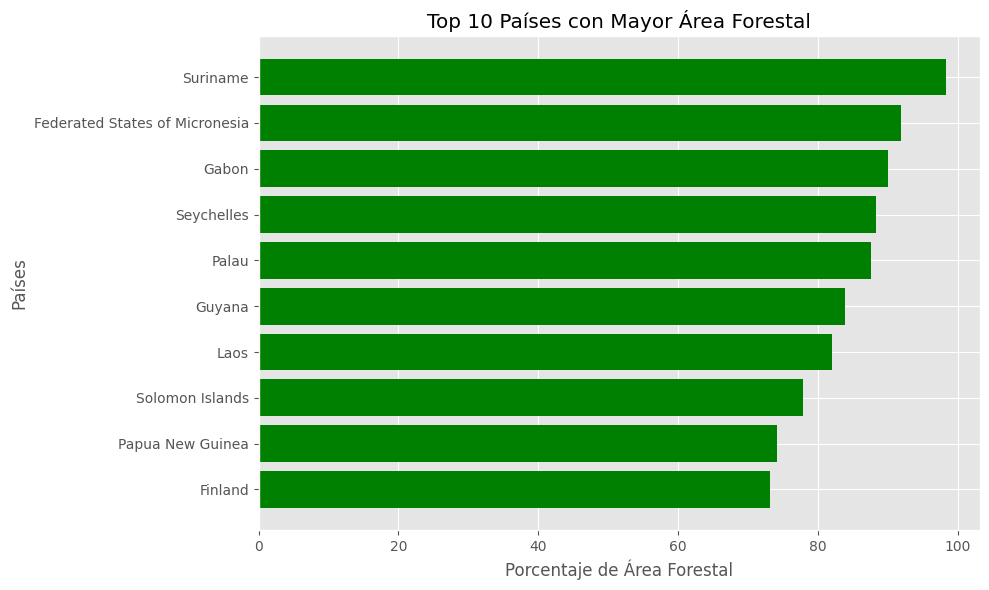

In [18]:
# Ordenar el DataFrame por '%forestedarea' de manera ascendente (mayor a menor)
sorted_df = df.sort_values(by='forestedarea', ascending=True)

# Obtener los 10 países con el mayor porcentaje de área forestal
top_10_countries = sorted_df.tail(10)  # Usar tail para obtener los últimos 10 (mayores) después de ordenar

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['country'], top_10_countries['forestedarea'], color='green')
plt.xlabel('Porcentaje de Área Forestal')
plt.ylabel('Países')
plt.title('Top 10 Países con Mayor Área Forestal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## 7.¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

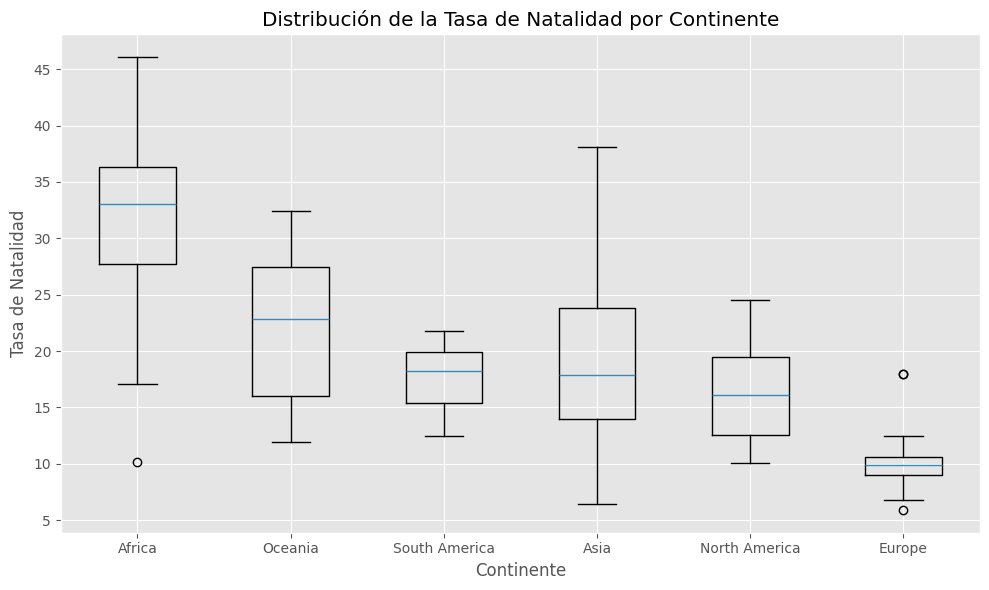

In [20]:
# Calcular la mediana de la tasa de natalidad por continente y ordenar los continentes en base a estas medianas
median_by_continent = df.groupby('continent')['birthrate'].median().sort_values(ascending=False)
ordered_continents = median_by_continent.index

# Crear el gráfico de caja (boxplot) utilizando el orden de continentes calculado
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['continent'] == continent]['birthrate'] for continent in ordered_continents],
            labels=ordered_continents)
plt.xlabel('Continente')
plt.ylabel('Tasa de Natalidad')
plt.title('Distribución de la Tasa de Natalidad por Continente')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Sí, existen diferencias notables en la distribución de la tasa de natalidad entre continentes. La distribución de la tasa de natalidad se puede ver en el gráfico de caja que se muestra arriba.

En general, la tasa de natalidad es más alta en los países de *África* y más baja en los países de *Europa*.

La mediana de la tasa de natalidad en *África* es significativamente más alta que la mediana de cualquier otra región.

En contraste, la mediana de la tasa de natalidad en *Europa* es significativamente más baja que la mediana de cualquier otra región.

Estas diferencias en la distribución de la tasa de natalidad entre continentes se deben a una serie de factores, que incluyen:

**Niveles de desarrollo humano**: Los países con un nivel de desarrollo humano más bajo tienden a tener tasas de natalidad más altas. Esto se debe a una serie de factores, que incluyen la falta de acceso a la educación y la planificación familiar, así como las normas sociales que fomentan la natalidad.

**Cultura y religión**: La cultura y la religión también pueden desempeñar un papel en la determinación de las tasas de natalidad. Por ejemplo, algunas religiones, como el catolicismo, prohíben el uso de métodos anticonceptivos, lo que puede conducir a tasas de natalidad más altas.

**Factores económicos**: Los factores económicos también pueden influir en las tasas de natalidad. Por ejemplo, las economías en crecimiento tienden a tener tasas de natalidad más bajas, ya que las personas tienen más oportunidades educativas y laborales, lo que les permite retrasar o posponer el tener hijos.

Es importante tener en cuenta que estas diferencias en la distribución de la tasa de natalidad entre continentes son tendencias generales. Hay países dentro de cada continente que tienen tasas de natalidad que difieren de la mediana del continente.

## 8.¿Cómo se relacionan el CPI y el precio de la gasolina?
Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

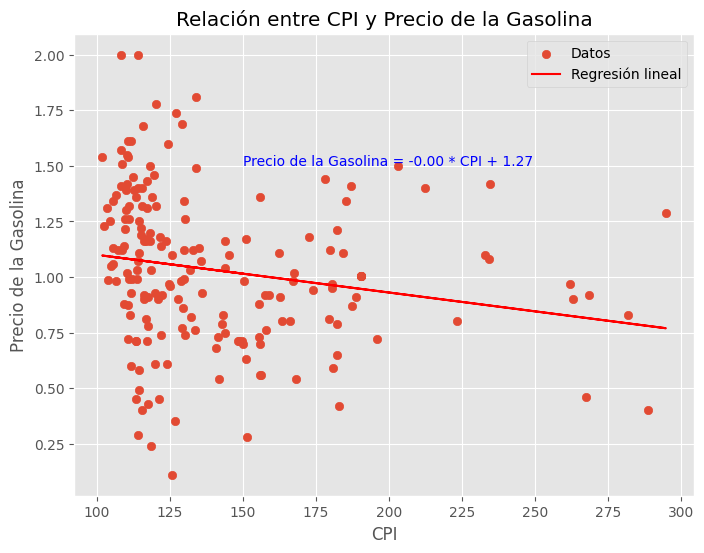

In [23]:
from scipy import stats

# Filtrar los valores del CPI entre 100 y 300
df_filtered = df[(df['cpi'] >= 100) & (df['cpi'] <= 300)]

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['cpi'], df_filtered['gasolineprice'])
line = slope * df_filtered['cpi'] + intercept

# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['cpi'], df_filtered['gasolineprice'], label='Datos')
plt.plot(df_filtered['cpi'], line, color='red', label='Regresión lineal')
plt.xlabel('CPI')
plt.ylabel('Precio de la Gasolina')
plt.title('Relación entre CPI y Precio de la Gasolina')

# Anotar la fórmula de la regresión lineal en el gráfico
formula_text = f'Precio de la Gasolina = {slope:.2f} * CPI + {intercept:.2f}'
plt.text(150, 1.5, formula_text, fontsize=10, color='blue')

plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


El gráfico qmuestra la relación entre el índice de precios al consumidor (CPI) y el precio de la gasolina en los distintos países del mundo. 

La regresión lineal es una ecuación que describe la relación entre dos variables. En este caso, la ecuación describe la relación entre el CPI y el precio de la gasolina.

La ecuación es la siguiente:

**Precio de la gasolina = -0.00 * CPI + 1.27**

En esta ecuación, el CPI es la variable independiente y el precio de la gasolina es la variable dependiente.

El coeficiente de la variable independiente, -0.00, indica que el precio de la gasolina aumenta a una tasa de 0,00 por cada punto porcentual que aumenta el CPI. Esto significa que un aumento del 1% en el CPI se traduce en un aumento de 0,00 en el precio de la gasolina.

El intercepto, 1.27, indica que el precio de la gasolina es de 1,27 dólares cuando el CPI es 0.

En general, esta ecuación indica que el precio de la gasolina está positivamente correlacionado con el CPI, pero la relación es débil. **Esto significa que el precio de la gasolina aumenta ligeramente cuando el CPI aumenta**.

El gráfico muestra que la regresión lineal es una aproximación razonable de los datos. La mayoría de los puntos de datos están cerca de la línea de regresión.

Sin embargo, hay algunos puntos de datos que están alejados de la línea de regresión. Estos puntos de datos pueden ser el resultado de factores que no se tienen en cuenta en la regresión lineal. Por ejemplo, los precios de la gasolina pueden verse afectados por eventos geopolíticos o por cambios en la oferta y la demanda.

En conclusión, la regresión lineal indica que **el precio de la gasolina está positivamente correlacionado con el CPI, pero la relación es débil**.

El gráfico muestra que el precio de la gasolina está positivamente correlacionado con el CPI. Esto significa que **cuando el CPI aumenta, el precio de la gasolina también tiende a aumentar**. Esto se debe a que la gasolina es un bien básico que las personas necesitan para sus actividades diarias. Cuando los precios de los bienes básicos aumentan, los consumidores tienen que gastar más dinero en ellos, lo que puede conducir a una inflación más alta.

**La relación entre el CPI y el precio de la gasolina es más fuerte en el corto plazo que en el largo plazo**. Esto se debe a que los *precios de la gasolina son más volátiles que el CPI*. Los precios de la gasolina pueden verse afectados por una serie de factores, como la oferta y la demanda, los precios del petróleo crudo y los eventos geopolíticos.